# TSP LP: CVXOPT

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#from numba import jit, njit, prange
#from itertools import permutations, combinations
from tqdm import tqdm_notebook as tqdm
#import networkx as nx
#from pulp import *
import cvxopt as cvx
seed = 42
np.random.seed(seed=seed)

In [3]:
def gen_path(num):
    path = np.concatenate([np.arange(num), [0]])
    X = np.random.random(num)
    Y = np.random.random(num)
    XY = X + Y * 1j
    return num, path, X, Y, XY

In [4]:
def gen_grid(W, H, noize=False):
    num = W * H
    path = np.concatenate([np.arange(num), [0]])
    w = np.linspace(0, 1, W+2) 
    h = np.linspace(0, 1, H+2)
    X = []
    nz = 0
    for _ in h[1:-1]:
        for i in w[1:-1]:
            if noize:
                nz = np.random.random()*noize
            X.append(i+nz) 
    Y = []
    for i in h[1:-1]:
        for _ in w[1:-1]:
            if noize:
                nz = np.random.random()*noize
            Y.append(i+nz)
    X = np.array(X)
    Y = np.array(Y)
    XY = X + Y * 1j
    return num, path, X, Y, XY

In [5]:
def plot_list(path, plist=False, size=6):
    plt.figure(figsize=(size, size))
    cmap = plt.get_cmap("tab10")
    plt.axis([0,1,0,1], 'equal')
    plt.plot(X[path], Y[path], alpha=0.5)
    plt.scatter(X[0], Y[0], s=80, c='r', marker='o')
    plt.scatter(X[1:], Y[1:], s=40, c=cmap(0), marker='o')
    if plist:
        for p in plist:
            plt.plot(X[p], Y[p])
    for i in range(num):
        plt.text(X[i], Y[i]+0.01, s=i, fontsize=10, color='gray')

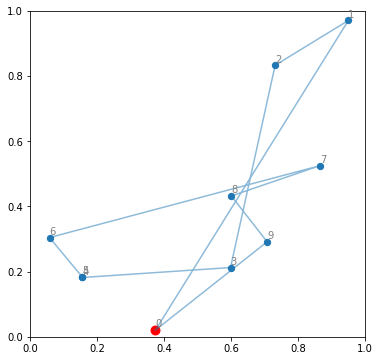

In [6]:
num, path, X, Y, XY = gen_path(10)
#num, path, X, Y, XY = gen_grid(4, 4, 0.1)
plot_list(path)

## Linear Programming

In [24]:
d = [[abs(XY[i] - XY[j]) for j in range(num) if i != j] for i in range(num)]

[[1.1104932820603384,
  0.8870664493697893,
  0.2949557163219585,
  0.27156974542266965,
  0.27252988110441834,
  0.4249781629643551,
  0.7041983565521177,
  0.4696314119405111,
  0.4295258147398169],
 [1.1104932820603384,
  0.2583327932911981,
  0.8353781959724453,
  1.1192046226681982,
  1.1181100982716126,
  1.1135092825135153,
  0.45310955453718704,
  0.6415807267488091,
  0.7207513560560428],
 [0.8870664493697893,
  0.2583327932911981,
  0.6342765424695918,
  0.8689366518792146,
  0.8677706084922024,
  0.8562422511644017,
  0.33567196363830837,
  0.4213402896593833,
  0.5417418987771183],
 [0.2949557163219585,
  0.8353781959724453,
  0.6342765424695918,
  0.44369036977477466,
  0.4436086067986944,
  0.5483314490270467,
  0.4113031505935224,
  0.21961964698133793,
  0.1348891420230783],
 [0.27156974542266965,
  1.1192046226681982,
  0.8689366518792146,
  0.44369036977477466,
  0.0015797267963511973,
  0.15677135951991944,
  0.7886226421254002,
  0.5105593206229513,
  0.562790212082